In [135]:
from standardInclude import *

In [167]:
subrun = 1049
entry = 3685

fileName = "./data/"+str(subrun)+".txt"

In [168]:
shouldSave = False
with open(fileName, "r") as ins:
    array = []
    for line in ins:
        #print(line, type(line))
        #print(line.strip().split(" "))
        if("event#" in line or 'Begin' in line):
            if("event# "+str(entry) in line):
                shouldSave = True
                print(line)
            else:
                shouldSave = False
        if(shouldSave and "POINTS" in line):
        #if('xtal[' in line and "POINTS" in line):
            ding = line.strip().split()
            #print(line)
            #print(ding)
            dong = [float(ding[3]), float(ding[6]), float(ding[9]), float(ding[12]),
                    float(ding[15]), float(ding[18]), float(ding[21]), float(ding[24]), ding[27] ]
            #print(dong)
            array.append(dong)

event# 3685 particleName = e+ pdgID = -11 trackID = 4 parentID = 1 point size = 262



In [169]:
dffull = pandas.DataFrame(array, columns = ['time', 'x', 'y', 'z', 'px', 'py', 'pz', 'E', 'Location'])
df = dffull
#df = dffull.loc[dffull['Location'] == 'xtal[00]']
#df = dffull[dffull['Location'].str.contains('xtal')]

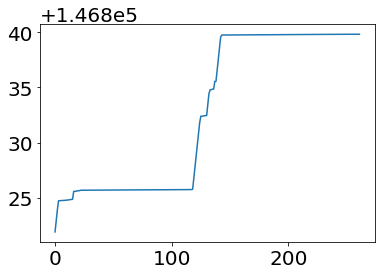

In [170]:
plt.plot(df['time'])
plt.show()

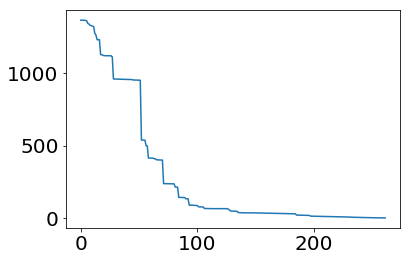

In [171]:
plt.plot(df['E'])
plt.show()

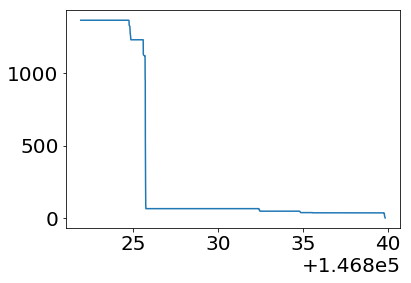

In [172]:
plt.plot(df['time'],df['E'])
plt.show()

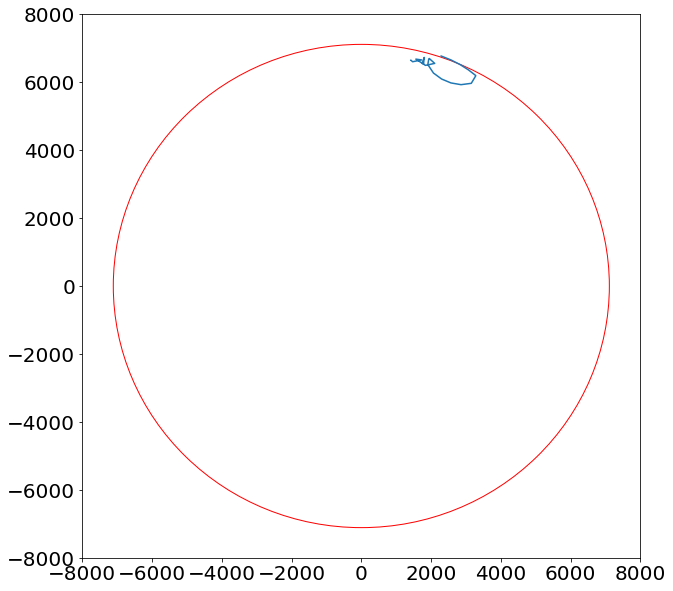

In [173]:
noint()
fig,ax = plt.subplots(figsize=(10,10))

plt.plot(df["z"],df['x'])

circle2 = plt.Circle((0,0), 7112, color='r', fill=False)
ax.add_artist(circle2)


plt.xlim(-8000,8000)
plt.ylim(-8000,8000)

plt.show()

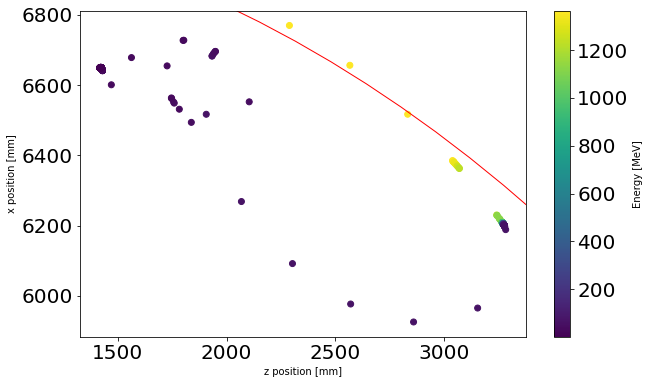

In [174]:
fig, ax = plt.subplots(figsize=(10,6))
#plt.plot(df["z"],df['x'],':',color='grey')

circle2 = plt.Circle((0,0), 7112, color='r', fill=False)
ax.add_artist(circle2)

sc = ax.scatter(df["z"],df['x'], c=df['E']) #,norm=matplotlib.colors.LogNorm())
plt.colorbar(sc,label='Energy [MeV]')

plt.xlabel("z position [mm]")
plt.ylabel("x position [mm]")

plt.show()

In [175]:
img = plt.imread("./data/ring.png")
#img = ndimage.rotate(imgOriginal, 12.5)

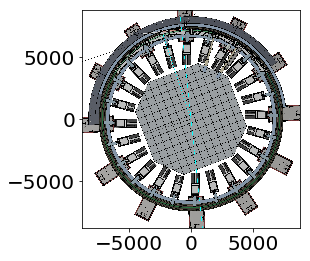

In [177]:
from matplotlib import transforms

fig = plt.figure()
ax = fig.add_subplot(111)

tr = transforms.Affine2D().rotate_deg(18.35)

rad = 8750
ax.imshow(img, transform=tr + ax.transData, extent=[-1*rad, rad,-1*rad, rad])
plt.show()

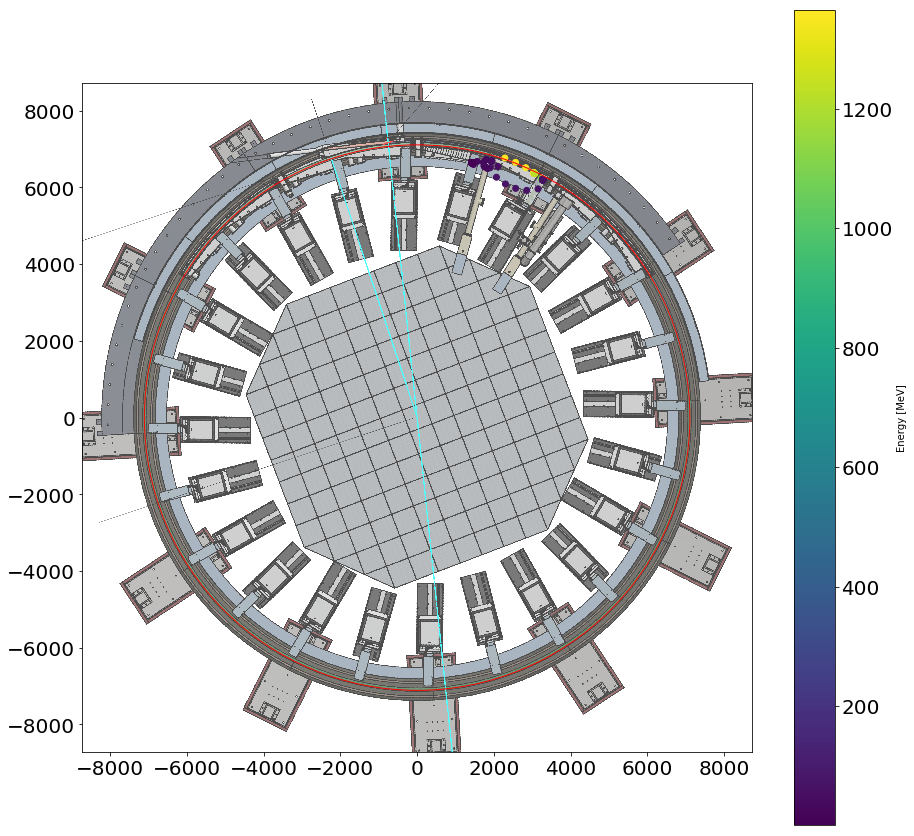

In [193]:
fig, ax = plt.subplots(figsize=(15,15))
x = range(300)
rad = 8730
alpha = 0.7
ax.imshow(img, extent=[-1*rad, rad,-1*rad, rad], transform=tr + ax.transData, alpha=alpha)

circle2 = plt.Circle((0,0), 7112, color='r', fill=False)
ax.add_artist(circle2)

#plt.plot(df["z"],df['x'],':',color='grey')

sc = ax.scatter(df["z"],df['x'], c=df['E']) #,norm=matplotlib.colors.LogNorm())
plt.colorbar(sc,label='Energy [MeV]')

#plt.plot([0,0],[-8000,8000],'b')
#plt.plot([-8000,8000],[0,0],'b')

plt.show()

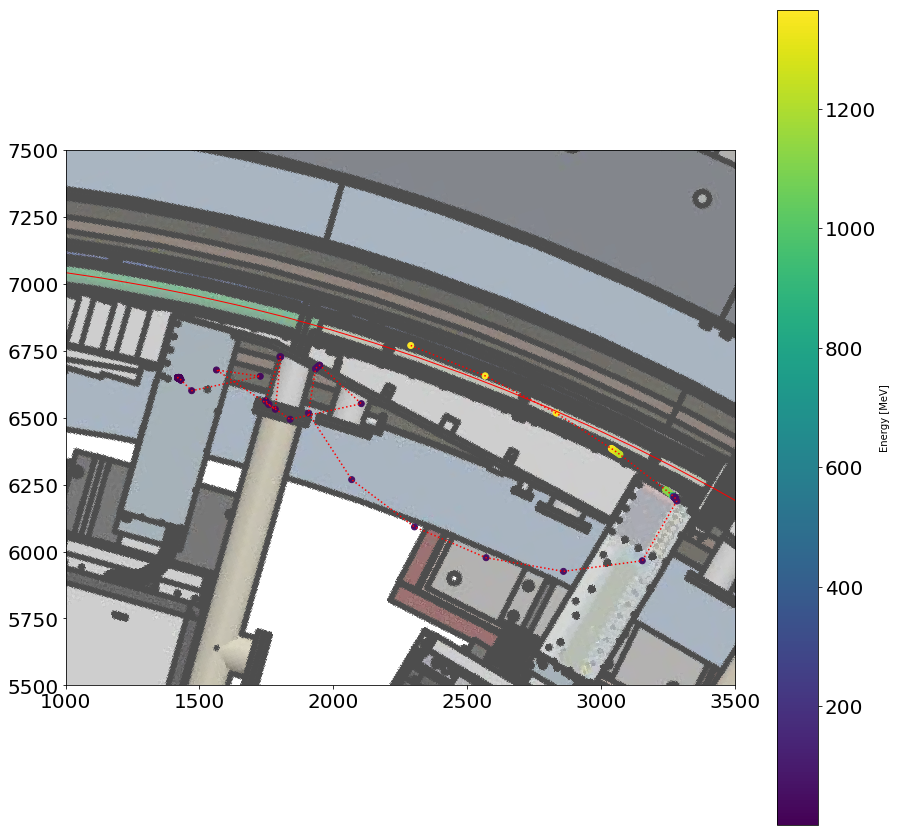

In [194]:
fig, ax = plt.subplots(figsize=(15,15))
plt.plot(df["z"],df['x'],':',color='r')

ax.imshow(img, extent=[-1*rad, rad,-1*rad, rad], transform=tr + ax.transData,alpha=alpha)

circle2 = plt.Circle((0,0), 7112, color='r', fill=False)
ax.add_artist(circle2)


sc = ax.scatter(df["z"],df['x'], c=df['E']) #,norm=matplotlib.colors.LogNorm())
plt.colorbar(sc,label='Energy [MeV]')

plt.xlim(1000,3500)
plt.ylim(5500,7500)

#plt.plot([0,0],[-8000,8000],'b')
#plt.plot([-8000,8000],[0,0],'b')

plt.show()